# Semantic Chunking
- bank.txt contains information about a Bank, a vegetarion resturant and a Hair Saloon. 
- When chunking, it has to sematic identify the context and perform chunking.

In [1]:
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = TextLoader("./bank.txt")
documents = loader.load()

In [2]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=0)

In [3]:
docs = text_splitter.split_documents(documents)
print(f"Number of documents: {len(docs)}")

Number of documents: 29


In [5]:
for i, doc in enumerate(docs):
    print(f"Chunk {i+1}: ",doc)

Chunk 1:  page_content='The Bank of Common Man is a community-centric financial institution, designed to empower individuals, families, and small businesses with accessible and straightforward banking solutions. Its mission' metadata={'source': './bank.txt'}
Chunk 2:  page_content='is to foster financial inclusion by offering a broad range of services tailored to meet the needs of the everyday person. The bank provides savings accounts with no minimum balance requirements,' metadata={'source': './bank.txt'}
Chunk 3:  page_content='allowing customers to build their financial security from the ground up, alongside checking accounts that feature no monthly maintenance fees and easy ATM access. For those looking to finance major' metadata={'source': './bank.txt'}
Chunk 4:  page_content='life events, The Bank of Common Man offers personal loans with flexible repayment options and quick approvals. Additionally, the bank plays a pivotal role in making homeownership attainable through' metadat

#Semantic Text Splitter

In [7]:
with open("./bank.txt","r",encoding="utf-8") as file:
    content = file.read()

In [17]:
!pip install semantic_text_splitter


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from semantic_text_splitter import TextSplitter
max_characters = 200
splitter = TextSplitter(max_characters, trim=False)
chunks_no_model =splitter.chunks(content)

In [36]:
for i, chunk in enumerate(chunks_no_model):
    print(f"Chunk {i+1}:", chunk)
  

Chunk 1: The Bank of Common Man is a community-centric financial institution, designed to empower individuals, families, and small businesses with accessible and straightforward banking solutions. 
Chunk 2: Its mission is to foster financial inclusion by offering a broad range of services tailored to meet the needs of the everyday person. 
Chunk 3: The bank provides savings accounts with no minimum balance requirements, allowing customers to build their financial security from the ground up, alongside checking accounts that feature no monthly 
Chunk 4: maintenance fees and easy ATM access. For those looking to finance major life events, The Bank of Common Man offers personal loans with flexible repayment options and quick approvals. 
Chunk 5: Additionally, the bank plays a pivotal role in making homeownership attainable through affordable mortgages and home loans, with competitive interest rates and personalized assistance throughout the 
Chunk 6: process. Entrepreneurs and small busin

In [42]:
from semantic_text_splitter import TextSplitter
from tokenizers import Tokenizer

max_tokens = 200
tokenizer = Tokenizer.from_pretrained("bert-base-uncased")
splitter = TextSplitter.from_huggingface_tokenizer(tokenizer, max_tokens)
chunks = splitter.chunks(content)

In [43]:
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}:",chunk)
    

Chunk 1: The Bank of Common Man is a community-centric financial institution, designed to empower individuals, families, and small businesses with accessible and straightforward banking solutions. Its mission is to foster financial inclusion by offering a broad range of services tailored to meet the needs of the everyday person. The bank provides savings accounts with no minimum balance requirements, allowing customers to build their financial security from the ground up, alongside checking accounts that feature no monthly maintenance fees and easy ATM access. For those looking to finance major life events, The Bank of Common Man offers personal loans with flexible repayment options and quick approvals. Additionally, the bank plays a pivotal role in making homeownership attainable through affordable mortgages and home loans, with competitive interest rates and personalized assistance throughout the process. Entrepreneurs and small businesses also find a strong partner in the bank’s bus

In [44]:
MIN_TOKENS =100
MAX_TOKENS =1000
splitter = TextSplitter.from_huggingface_tokenizer(tokenizer, capacity=(MIN_TOKENS, MAX_TOKENS))
chunks_with_model = splitter.chunks(content)

In [45]:
for i, chunk in enumerate(chunks_with_model):
    print(f"Chunk {i+1}:",chunk)

Chunk 1: The Bank of Common Man is a community-centric financial institution, designed to empower individuals, families, and small businesses with accessible and straightforward banking solutions. Its mission is to foster financial inclusion by offering a broad range of services tailored to meet the needs of the everyday person. The bank provides savings accounts with no minimum balance requirements, allowing customers to build their financial security from the ground up, alongside checking accounts that feature no monthly maintenance fees and easy ATM access. For those looking to finance major life events, The Bank of Common Man offers personal loans with flexible repayment options and quick approvals. Additionally, the bank plays a pivotal role in making homeownership attainable through affordable mortgages and home loans, with competitive interest rates and personalized assistance throughout the process. Entrepreneurs and small businesses also find a strong partner in the bank’s bus

# Visualize
### How good are embeddings based on the sematic-text-splitter

In [47]:
from langchain_openai import OpenAIEmbeddings
import os
from dotenv import load_dotenv
load_dotenv()
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [48]:
embeddings_with_no_model = [embeddings.embed_query(chunk) for chunk in chunks_no_model]
embeddings_with_model = [embeddings.embed_query(chunk) for chunk in chunks_with_model]
query = "What are the services offered in the bank?"
question = embeddings.embed_query(query)

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim_no_model = [cosine_similarity([question],[emb])[0][0] for emb in embeddings_with_no_model]
cos_sim_with_model = [cosine_similarity([question],[emb])[0][0] for emb in embeddings_with_model]

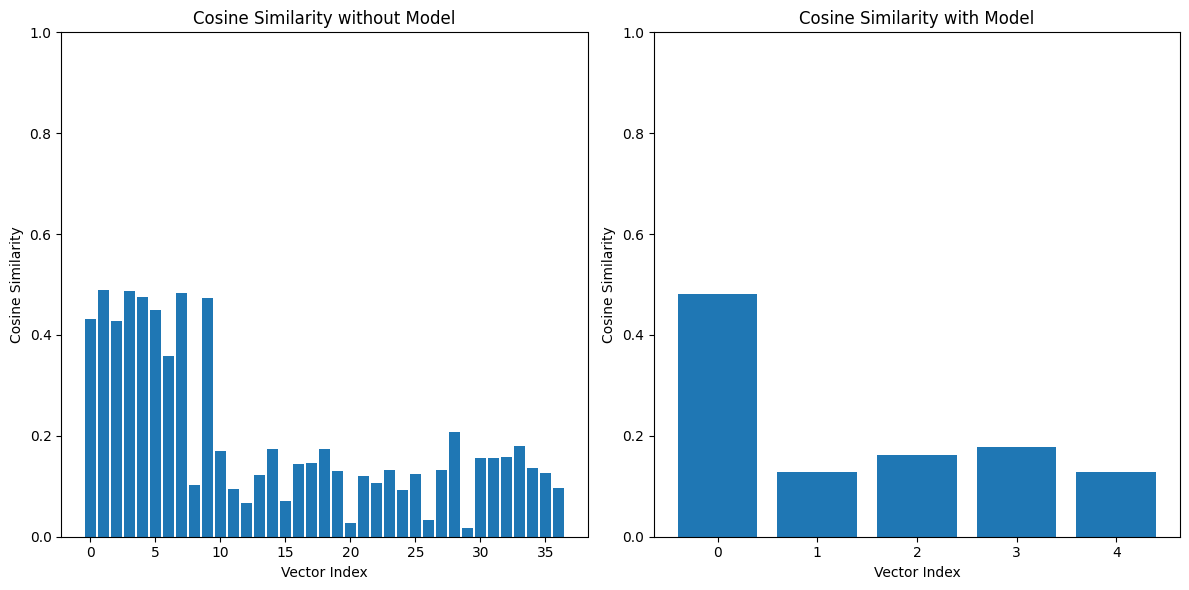

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.bar(range(len(cos_sim_no_model)),cos_sim_no_model)
plt.title("Cosine Similarity without Model")
plt.xlabel("Vector Index")
plt.ylabel("Cosine Similarity")
plt.ylim(0,1)

plt.subplot(1, 2, 2)
plt.bar(range(len(cos_sim_with_model)),cos_sim_with_model)
plt.title("Cosine Similarity with Model")
plt.xlabel("Vector Index")
plt.ylabel("Cosine Similarity")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()